problem:
1.What is NLP in Python?
2.What are the 5 steps in NLP?



answer:
1.Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

2.Phases of NLP
a.Lexical or Morphological Analysis. Lexical or Morphological Analysis is the initial step in NLP. ...
b.Syntax Analysis or Parsing. ...
c.Semantic Analysis. ...
d.Discourse Integration. ...
e.Pragmatic Analysis.

In [2]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression libary.
import nltk # Natural Language toolkit
nltk.download("stopwords")  #downloading stopwords
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


In [3]:
df=pd.read_csv("../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv",sep=",")

##### Take a look at the data

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
df.isnull().sum() # looking for null values

Review    0
Rating    0
dtype: int64

### Data Preproccesing,cleaning

In [7]:
review_list=[]

for review in df.Review:
    review=re.sub("[^a-zA-z]"," ",review) # if expression in the sentence is not a word then this code change them to space
    review=review.lower() # turns all word in the sentence into lowercase.
    review=nltk.word_tokenize(review) # splits the words that are in the sentence from each other.
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] # this code finds the root of the word for a word in the sentence and change them to their root form.
    review=" ".join(review)
    review_list.append(review) # store sentences in list
    


## Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of Words

max_features=500 # "number" most common(used) words in reviews

count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english") # stop words will be dropped by stopwords command

sparce_matrix=count_vectorizer.fit_transform(review_list).toarray()# this code will create matrix that consist of 0 and 1.



In [9]:
sparce_matrix.shape 

(20491, 500)

Top 2000 the most used word and 20491 sentences that are in review.

As you see columns of the matrix consist of the most common words and  rows of the matrix consist of sentences

In [10]:
sparce_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 2, 0]])

In [11]:
print("Top {} the most used word by reviewers: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 500 the most used word by reviewers: ['able', 'absolutely', 'access', 'activity', 'actually', 'afternoon', 'air', 'airport', 'amazing', 'amenity', 'american', 'amsterdam', 'area', 'arrival', 'arrived', 'ask', 'asked', 'ate', 'attraction', 'available', 'average', 'away', 'awesome', 'bad', 'bag', 'balcony', 'bar', 'barcelona', 'basic', 'bath', 'bathroom', 'beach', 'beautiful', 'bed', 'bedroom', 'beer', 'believe', 'best', 'better', 'big', 'bit', 'block', 'book', 'booked', 'booking', 'bottle', 'breakfast', 'bring', 'brought', 'buffet', 'building', 'bus', 'business', 'busy', 'buy', 'ca', 'cab', 'cafe', 'called', 'came', 'cana', 'car', 'card', 'care', 'casino', 'center', 'central', 'centre', 'certainly', 'chair', 'change', 'charge', 'cheap', 'check', 'checked', 'cheese', 'child', 'choice', 'choose', 'chose', 'city', 'clean', 'cleaned', 'close', 'club', 'coffee', 'cold', 'come', 'comfortable', 'coming', 'comment', 'complaint', 'complimentary', 'concierge', 'conditioning', 'convenient', 'c

In [12]:
data=pd.DataFrame(count_vectorizer.get_feature_names(),columns=["Words"])

In [13]:
data.head()

,Words
0,able
1,absolutely
2,access
3,activity
4,actually


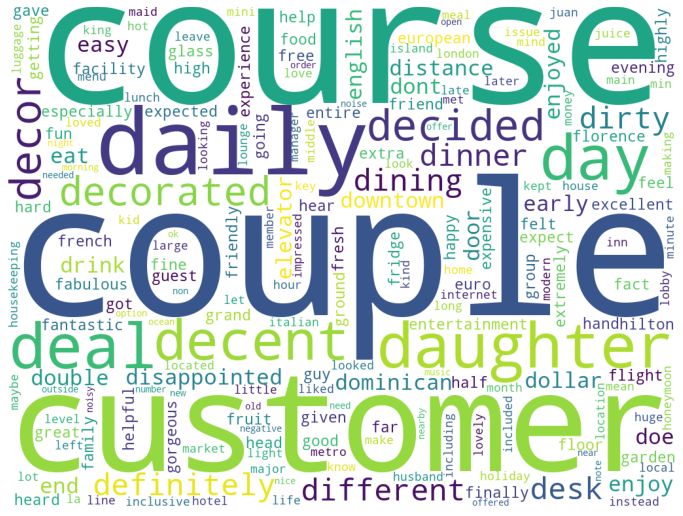

In [14]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(data.Words[100:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Categories:

1=very bad

2=bad

3=avarage

4=good

5=very good

In [16]:
X=sparce_matrix
y=df.Rating

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss,precision_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (16392, 500)
x_test (4099, 500)
y_train (16392,)
y_test (4099,)


In [18]:
from sklearn.svm import SVC

## LightGBM Classifier

In [19]:
lgbm_model=LGBMClassifier()

lgbm_model.fit(X_train,y_train)

LGBMClassifier()

In [20]:
y_pred=lgbm_model.predict(X_test)

In [21]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))

Accuracy: 0.594779214442547
Precision: 0.594779214442547


# XGBM classifier

In [22]:
xgb=XGBClassifier()
xgb_model=xgb.fit(X_train,y_train)

In [23]:
y_pred=xgb_model.predict(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))

Accuracy: 0.5806294218101976
Precision: 0.5806294218101976


## Naive Bayes

In [24]:
from sklearn.naive_bayes import BernoulliNB

nb=GaussianNB()
nb2=BernoulliNB()

nb_model=nb.fit(X_train,y_train)
nb2_model=nb2.fit(X_train,y_train)

In [25]:
y_pred=nb_model.predict(X_test)
y_pred2=nb2_model.predict(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))
print("**************************************************************")
print("Accuracy_NB2:",accuracy_score(y_test, y_pred2))
print("Precision_NB2:",precision_score(y_test, y_pred2,average="micro"))

Accuracy: 0.49548670407416445
Precision: 0.49548670407416445
**************************************************************
Accuracy_NB2: 0.5074408392290802
Precision_NB2: 0.5074408392290802


## RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier


rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred=rf_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))


Accuracy: 0.5530617223713101
Precision: 0.5530617223713101


I got really low accuracy score. I would get   higher accuracy if I tuned my models or changed max_features.I tried to tune my models parameter but it took too much time(about 30 min. and still continue) so I stopped tunning.

this end of my notebook if you like please upvote :)